In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
ratings_col = ["user_id", "movie_id", "rating", "timestmp"]
train = [pd.read_table("./ml-100k/u"+ele+".base", header=-1) for ele in ["1","2","3", "4", "5"]]
test = [pd.read_table("./ml-100k/u1.test", header=-1)for ele in ["1","2","3", "4", "5"]]

In [3]:
train[0][:5]

,0,1,2,3
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [4]:
test[1][:5]

,0,1,2,3
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [5]:
lr = LinearRegression()
lr.fit(train[0][[0, 1, 3]], train[0][2])
lr.coef_, lr.intercept_

(array([ -4.10093097e-05,  -6.28474052e-04,  -6.05784007e-11]),
 3.8709562773899506)

In [6]:
pred = lr.predict(test[0][[0, 1, 3]])
pred = [int(round(ele)) for ele in pred]
cm = sklearn.metrics.confusion_matrix(pred, test[0][2], labels = [1,2,3,4,5])

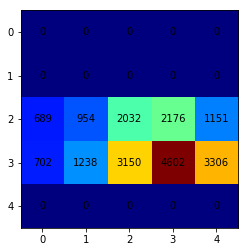

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(cm, cmap=plt.cm.jet, 
                interpolation='nearest')

for x in range(5):
    for y in range(5):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

In [8]:
master_dataset = pd.read_csv('master_data.csv', encoding='latin-1')
data = master_dataset.copy()
master_dataset[:5]

,Unnamed: 0,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
1,1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),...,0,1,0,0,1,0,0,1,0,0
2,2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),...,0,0,0,0,0,0,0,0,0,0
3,3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),...,0,0,0,0,0,1,0,0,1,1
4,4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),...,0,0,0,0,0,0,0,0,0,0


In [9]:
ridge = Ridge(alpha=100)
#data["occu"] = pd.get_dummies()
print(data.columns)
dep_data = data.select_dtypes(include=["int64"])
X_train, X_test, y_train, y_test = train_test_split(dep_data.drop("rating", axis=1), data["rating"], test_size=0.2, random_state=0)

ridge.fit(X_train, y_train)
ridge.coef_

Index(['Unnamed: 0', 'user_id', 'movie_id', 'rating', 'timestamp', 'age',
       'gender', 'occupation', 'zip code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


array([ -9.45870105e-08,  -1.42641528e-05,  -6.37564825e-04,
        -2.50710478e-09,   3.62807998e-03,  -1.32685685e-02,
        -1.33001972e-01,   6.31985841e-02,   2.80242654e-01,
        -2.36699358e-01,  -1.25800863e-01,  -1.41264502e-02,
         2.78927980e-01,   1.85728629e-01,  -8.80683842e-02,
         3.86864186e-01,  -1.63183158e-01,   1.18623693e-02,
         9.73578073e-02,   9.78600623e-02,  -1.62556014e-02,
        -2.11890529e-02,   1.75990496e-01,   1.00757729e-01])

In [10]:
pred = ridge.predict(X_test)
pred = [int(round(ele)) for ele in pred]
cm = sklearn.metrics.confusion_matrix(pred, test[0][2], labels = [1,2,3,4,5])

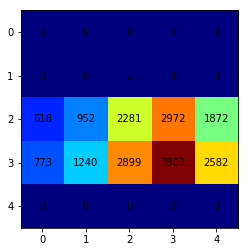

In [11]:
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(cm, cmap=plt.cm.jet, 
                interpolation='nearest')

for x in range(5):
    for y in range(5):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

Adding all the additional information does not really help the prediction.

Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_leaf=3, max_features="sqrt", random_state=0)

dt.fit(X_train, y_train)
tuple(sorted(zip( dt.feature_importances_, X_train.columns), reverse=True))[:10]

((0.20442203691641139, 'timestamp'),
 (0.19407397104332386, 'user_id'),
 (0.19301128348599361, 'Unnamed: 0'),
 (0.17026244823730444, 'age'),
 (0.13912084886072912, 'movie_id'),
 (0.012886593081157728, 'Drama'),
 (0.010692708614729617, 'Romance'),
 (0.01020126669435286, 'Thriller'),
 (0.0095680176763623462, 'Comedy'),
 (0.0091742998441303823, 'War'))

In [13]:
pred = dt.predict(X_test)
pred = [int(round(ele)) for ele in pred]
cm = sklearn.metrics.confusion_matrix(pred, test[0][2], labels = [1,2,3,4,5])

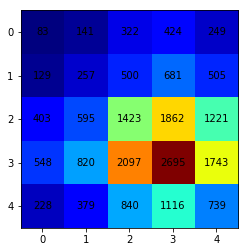

In [14]:
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(cm, cmap=plt.cm.jet, 
                interpolation='nearest')

for x in range(5):
    for y in range(5):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

Clearly dtree is a better classifer than LR with rounding. Especially for a system with personalization, it provides a good wholistic view.

While Decision Tree provides us with a decent model, we can achieve even better results if we impute the missing data. Let us look if we can discover some patterns in the missing data. We will first perform 5-fold cross validation to look at the different scores.

In [15]:
#lr, ridge, dt: Perform 5 fold Cross Validation
master_dataset = pd.read_csv('master_data.csv', encoding='latin-1')
data_cv = master_dataset.copy()
X, y = data_cv.select_dtypes(include=["int64"]).drop('rating', axis=1), data_cv['rating']

In [16]:
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')*-1
lr_rmse = np.mean([ele**.5 for ele in lr_scores])
print(lr_scores, lr_rmse)

[ 1.23417588  1.19474463  1.1633054   1.15975578  1.17085502] 1.08830498356


In [17]:
rd = Ridge(alpha=100)
rd_scores = cross_val_score(rd, X, y, cv=5, scoring='neg_mean_squared_error')*-1
rd_rmse = np.mean([ele**.5 for ele in rd_scores])
print(rd_scores, rd_rmse)

[ 1.23411223  1.19452638  1.16332716  1.15967624  1.17112594] 1.08829895308


In [18]:
dt = DecisionTreeClassifier(min_samples_leaf=3, max_features="sqrt", random_state=0)
dt_scores = cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')*-1
dt_rmse = np.mean([ele**.5 for ele in dt_scores])
print(dt_scores, dt_rmse)

[ 6.30783461  2.09655     1.97735     2.01645     2.85614281] 1.69514003094
